<a href="https://colab.research.google.com/github/DhivyaaSP/Deep-Learning/blob/main/Exercise_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

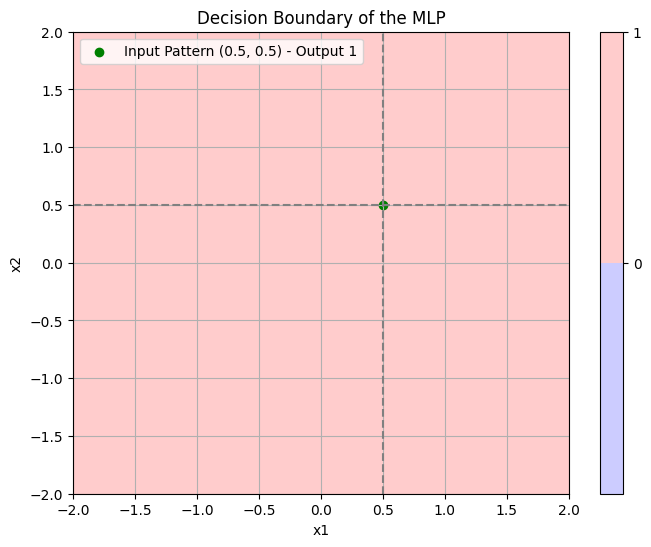

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function
def step_function(s):
    return 1 if s >= 0 else 0

# Generalized MLP computation
def generalized_mlp_output(x, weights, biases):
    hidden_layer_outputs = []
    for neuron_weights, neuron_bias in zip(weights['hidden'], biases['hidden']):
        s = np.dot(neuron_weights, x) + neuron_bias
        hidden_layer_outputs.append(step_function(s))

    output_s = np.dot(weights['output'], hidden_layer_outputs) + biases['output']
    final_output = step_function(output_s)

    return final_output

# Plotting function for the decision boundary
def plot_decision_boundary(X1, X2, Z, input_pattern, mlp_final_output):
    plt.figure(figsize=(8, 6))
    # The contourf plot will show the '+' and '0' regions
    plt.contourf(X1, X2, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'red'])
    plt.colorbar(ticks=[0, 1])
    # The scatter plot marks the input pattern
    plt.scatter(*input_pattern, color='green', label=f'Input Pattern {input_pattern} - Output {mlp_final_output}')
    # The dashed lines intersect at the input pattern
    plt.axhline(y=input_pattern[1], color='grey', linestyle='--')
    plt.axvline(x=input_pattern[0], color='grey', linestyle='--')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary of the MLP')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the weights and biases as dictionaries
weights = {
    'hidden': [[1, 1], [-1, -1]],  # weights for hidden layer neurons
    'output': [1, 1]          # weights for output neuron
}

biases = {
    'hidden': [-0.5, 1.5],  # biases for hidden layer neurons
    'output': -1           # bias for output neuron
}

# Define the input pattern
input_pattern = (0.5, 0.5)

# Generate a grid of points in the 2D space
x1_range = np.linspace(-2, 2, 400)
x2_range = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute the MLP output for each point in the grid
outputs = np.array([generalized_mlp_output((x1, x2), weights, biases) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = outputs.reshape(X1.shape)

# Compute the final output for the input pattern
mlp_final_output = generalized_mlp_output(input_pattern, weights, biases)

# Use the plotting function to visualize the decision boundary
plot_decision_boundary(X1, X2, Z, input_pattern, mlp_final_output)
